<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cargamos-librerias" data-toc-modified-id="Cargamos-librerias-1">Cargamos librerias</a></span><ul class="toc-item"><li><span><a href="#metricas-de-evaluacion-(sigmas)-+-funciones-de-utilidad" data-toc-modified-id="metricas-de-evaluacion-(sigmas)-+-funciones-de-utilidad-1.1">metricas de evaluacion (sigmas) + funciones de utilidad</a></span></li><li><span><a href="#Datos-de-entrenamiento!" data-toc-modified-id="Datos-de-entrenamiento!-1.2">Datos de entrenamiento!</a></span></li><li><span><a href="#usamos-🐼" data-toc-modified-id="usamos-🐼-1.3">usamos 🐼</a></span></li><li><span><a href="#preprocesamiento-para-X-y-Y" data-toc-modified-id="preprocesamiento-para-X-y-Y-1.4">preprocesamiento para X y Y</a></span></li></ul></li><li><span><a href="#ML-con-Scikit-learn" data-toc-modified-id="ML-con-Scikit-learn-2">ML con Scikit-learn</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Regression-Logistica" data-toc-modified-id="Regression-Logistica-2.0.1">Regression Logistica</a></span><ul class="toc-item"><li><span><a href="#Coeficientes" data-toc-modified-id="Coeficientes-2.0.1.1">Coeficientes</a></span></li></ul></li></ul></li><li><span><a href="#predecir-probabilidades" data-toc-modified-id="predecir-probabilidades-2.1">predecir probabilidades</a></span></li><li><span><a href="#SGDclassifier-(Regression-Logistica)" data-toc-modified-id="SGDclassifier-(Regression-Logistica)-2.2">SGDclassifier (Regression Logistica)</a></span><ul class="toc-item"><li><span><a href="#Actividad:-Evalua!" data-toc-modified-id="Actividad:-Evalua!-2.2.1">Actividad: Evalua!</a></span></li></ul></li><li><span><a href="#Regularizacion" data-toc-modified-id="Regularizacion-2.3">Regularizacion</a></span></li></ul></li><li><span><a href="#Actividad:" data-toc-modified-id="Actividad:-3">Actividad:</a></span><ul class="toc-item"><li><span><a href="#Metodos-de-ensembles" data-toc-modified-id="Metodos-de-ensembles-3.1">Metodos de ensembles</a></span></li><li><span><a href="#predecir-probabilidades" data-toc-modified-id="predecir-probabilidades-3.2">predecir probabilidades</a></span></li><li><span><a href="#Modelos-de-arboles:-feature-importance" data-toc-modified-id="Modelos-de-arboles:-feature-importance-3.3">Modelos de arboles: feature importance</a></span></li><li><span><a href="#Mejorando-la-regla-de-decision" data-toc-modified-id="Mejorando-la-regla-de-decision-3.4">Mejorando la regla de decision</a></span><ul class="toc-item"><li><span><a href="#en-vez-de-0.5-usaremos-un-percentil" data-toc-modified-id="en-vez-de-0.5-usaremos-un-percentil-3.4.1">en vez de 0.5 usaremos un percentil</a></span></li></ul></li><li><span><a href="#Probabilidad-de-corte" data-toc-modified-id="Probabilidad-de-corte-3.5">Probabilidad de corte</a></span></li></ul></li><li><span><a href="#Actividad:" data-toc-modified-id="Actividad:-4">Actividad:</a></span></li></ul></div>

![](extra/atlas.png)
# Cargamos librerias

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import scipy as sc
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display
import sys

## metricas de evaluacion (sigmas) + funciones de utilidad

![http://i.imgur.com/Hflz2lG.jpg](http://i.imgur.com/Hflz2lG.jpg)

In [10]:
from sklearn.metrics import roc_curve, auc

    
def AMSScore(s,b): 
    return np.sqrt (2.*( (s + b + 10.)*np.log(1.+s/(b+10.))-s))

def eval_model(Y_true_train,Y_pred_train,w_train,Y_true_test,Y_pred_test,w_test):
    ratio =  float(len(X_train)) /float(len(X_test))
    TruePositive_train = w_train*(Y_true_train==1.0)*(1.0/ratio)
    TrueNegative_train = w_train*(Y_true_train==0.0)*(1.0/ratio)
    TruePositive_valid = w_test*(Y_true_test==1.0)*(1.0/(1-ratio))
    TrueNegative_valid = w_test*(Y_true_test==0.0)*(1.0/(1-ratio))
    s_train = sum ( TruePositive_train*(Y_pred_train==1.0) )
    b_train = sum ( TrueNegative_train*(Y_pred_train==1.0) )
    s_test = sum ( TruePositive_valid*(Y_pred_test==1.0) )
    b_test = sum ( TrueNegative_valid*(Y_pred_test==1.0) )
    score_train = AMSScore(s_train,b_train)
    score_test = AMSScore(s_test,b_test)
    print('--- Resultados --')
    print('- AUC train: {:.3f} '.format(sk.metrics.roc_auc_score(Y_train,Y_train_pred)))
    print('- AUC test : {:.3f} '.format(sk.metrics.roc_auc_score(Y_test,Y_test_pred)))
    print('- AMS train: {:.3f} sigma'.format(score_train))
    print('- AMS test : {:.3f} sigma'.format(score_test))
    return score_train, score_test

def plot_roc(clf,Y_test,Y_test_prob):
    fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=str(clf.__class__.__name__))
    plt.plot(np.linspace(0,1,100),np.linspace(0,1,100), lw=2, alpha=0.3, label='Suerte')
    plt.legend(loc='lower right')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.tight_layout()
    return

## Datos de entrenamiento!

Quieres saber mas? Visita [http://higgsml.lal.in2p3.fr/documentation](http://higgsml.lal.in2p3.fr/documentation)

In [ ]:
!wget 

## usamos 🐼


In [4]:
df=pd.read_csv('datos/training.csv')
print(df.shape)
df.head(1)

(250000, 33)


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.47,51.655,97.827,27.98,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.15,0.444,46.062,1.24,-2.475,113.497,0.002653,s


## preprocesamiento para X y Y

In [5]:
Y = df['Label'].replace(to_replace=['s','b'],value=[1,0]).values #Estas son las variables a predecir (Target values)
weights = df['Weight'].values # Estos son los que nos dicen info acerca de qué tan confiable es la medición
X = df.drop(['EventId','Label','Weight'],axis=1).values #Quitamos esas tres columnas y el resto lo usamos como datos para entrenar

In [ ]:
#Hemos separado training data y test data

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test,w_train,w_test = train_test_split(X,Y,weights,train_size=0.4) #40% train data
print(X_train.shape,Y_train.shape,w_train.shape)
print(X_test.shape,Y_test.shape,w_test.shape)

(100000, 30) (100000,) (100000,)
(150000, 30) (150000,) (150000,)


/home/hackerman/anaconda2/envs/py36-test/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# ML con Scikit-learn

![[](http://scikit-learn.org/stable/)](extra/sklearn_logo.png)

### Regression Logistica

** Modelo :** $h_{\theta}(x) = g(\theta^{T}x) = g(\sum \theta_i x_i +b)$ con $g(z)=\frac{1}{1+e^{-z}}$

** optimizador, metrica?**

In [31]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(verbose=1)
clf.fit(X_train,Y_train) 

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)

#### Coeficientes

$$\sum \theta_i x_i + b $$

In [ ]:
# Podemos ver lo que hay dentro del modelo

a = [[ 5.65522082e-04 -1.86893940e-02 -2.55375068e-02  3.09424522e-03
  -2.27296911e-01  2.65063806e-03 -5.56028981e-02  1.23411883e+00
   1.06471244e-04  1.71881303e-02 -9.86398146e-01  1.95995228e-01
   3.30048129e-01  4.27608367e-03  6.59952641e-03 -4.29627664e-03
   3.09454749e-02 -6.95534780e-03 -2.30453105e-03  7.46334322e-03
  -3.17726284e-03 -1.74097893e-03 -7.33194695e-01 -3.80362124e-03
   4.80530550e-03  1.49909620e-04 -6.83866427e-03 -2.48385215e-02
  -1.68799380e-02 -1.81302136e-02]]
b = [-0.30916809]


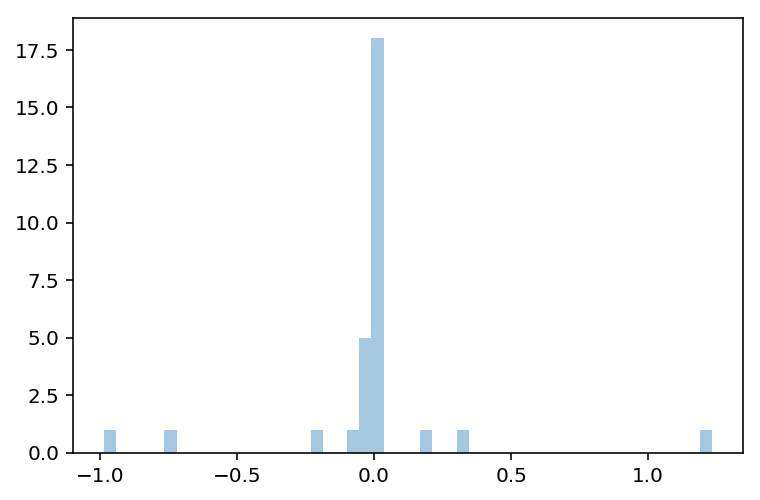

In [32]:
print('a = {}'.format(clf.coef_))
print('b = {}'.format(clf.intercept_))
sns.distplot(clf.coef_,kde=False)
plt.show()

## predecir probabilidades

In [34]:
import sklearn as sk
Y_train_pred = clf.predict(X_train)
Y_test_pred = clf.predict(X_test)
Y_train_prob=clf.predict_proba(X_train)[:,1]
Y_test_prob =clf.predict_proba(X_test)[:,1]
print('AUC:')
print('train: {:2.4f}'.format(sk.metrics.roc_auc_score(Y_train,Y_train_pred)))
print('test:  {:2.4f}'.format(sk.metrics.roc_auc_score(Y_test,Y_test_pred)))
eval_model(Y_train,Y_train_pred,w_train,Y_test,Y_test_pred,w_test) # --> w_train, w_test are validation values

AUC:
train: 0.6984
test:  0.7013
--- Resultados --
- AUC train: 0.698 
- AUC test : 0.701 
- AMS train: 1.564 sigma
- AMS test : 2.688 sigma


(1.5635485890477594, 2.6880369442442347)

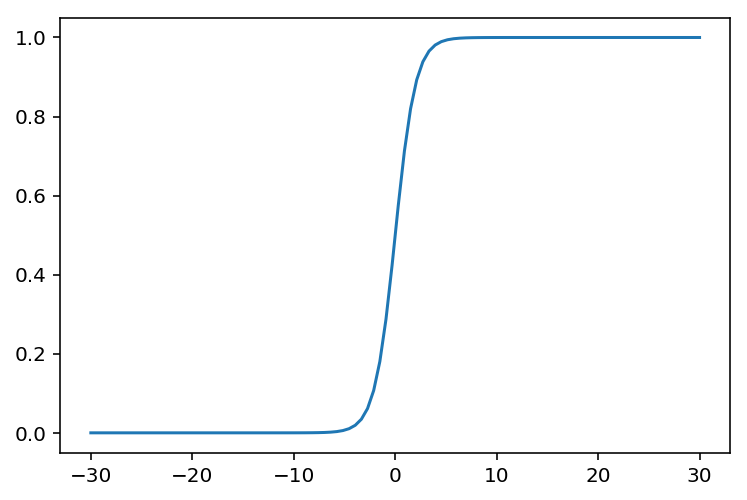

In [23]:
x = np.linspace(-30,30,100)
plt.plot(x,1.0/(1+np.exp(-x)))
plt.show()

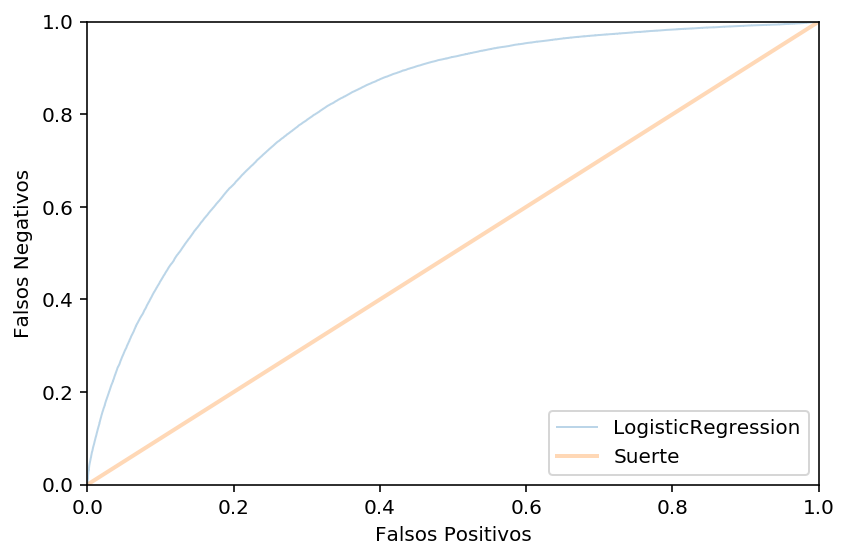

In [24]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=0.3, label=str(clf.__class__.__name__))
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100), lw=2, alpha=0.3, label='Suerte')
plt.legend(loc='lower right')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('Falsos Positivos')
plt.ylabel('Falsos Negativos')
plt.tight_layout()
plt.show()

## SGDclassifier (Regression Logistica)

** Modelo :** $h_{\theta}(x) = g(\theta^{T}x)$ con $g(z)=\frac{1}{1+e^{-z}}$

** Costo :** $$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}y^{i}\log(h_\theta(x^{i}))+(1-y^{i})\log(1-h_\theta(x^{i}))$$
** Optimizador:** Descenso de gradiente


Ojo, la derivada del costo es:
$$ \frac{\partial}{\partial\theta_{j}}J(\theta) =\sum_{i=1}^{m}(h_\theta(x^{i})-y^i)x_j^i$$

In [41]:
from sklearn.linear_model import SGDClassifier # <-- Stocasthic gradient descent optimizer

clf = SGDClassifier(loss='modified_huber',verbose=1,max_iter=700) # <-- 500 epochs
clf.fit(X_train,Y_train)

# Lo que se intenta optimizar es la derivada del costo

-- Epoch 1
Norm: 24549.76, NNZs: 30, Bias: -814.979480, T: 100000, Avg. loss: 8913543.054164
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 11933.78, NNZs: 30, Bias: -850.242561, T: 200000, Avg. loss: 1255337.292205
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 9724.28, NNZs: 30, Bias: -863.510556, T: 300000, Avg. loss: 738996.931738
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 7885.61, NNZs: 30, Bias: -881.452112, T: 400000, Avg. loss: 528938.823545
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 5691.84, NNZs: 30, Bias: -895.233035, T: 500000, Avg. loss: 410361.567642
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 5317.11, NNZs: 30, Bias: -902.149955, T: 600000, Avg. loss: 333729.534469
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 4811.51, NNZs: 30, Bias: -906.994935, T: 700000, Avg. loss: 280796.451622
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 4406.54, NNZs: 30, Bias: -913.776009, T: 800000, Avg. loss: 244266.993499
Total training time: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='modified_huber', max_iter=700,
       n_iter=None, n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=1, warm_start=False)

### Actividad: Evalua!

In [42]:
import sklearn as sk
Y_train_pred = clf.predict(X_train)
Y_test_pred = clf.predict(X_test)
Y_train_prob=clf.predict_proba(X_train)[:,1]
Y_test_prob =clf.predict_proba(X_test)[:,1]
print('AUC:')
print('train: {:2.4f}'.format(sk.metrics.roc_auc_score(Y_train,Y_train_pred)))
print('test:  {:2.4f}'.format(sk.metrics.roc_auc_score(Y_test,Y_test_pred)))
eval_model(Y_train,Y_train_pred,w_train,Y_test,Y_test_pred,w_test) # --> w_train, w_test are validation values

AUC:
train: 0.6666
test:  0.6691
--- Resultados --
- AUC train: 0.667 
- AUC test : 0.669 
- AMS train: 1.447 sigma
- AMS test : 2.486 sigma


(1.4467744447590787, 2.486212326357438)

## Regularizacion




** Costo :** $$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}y^{i}\log(h_\theta(x^{i}))+(1-y^{i})\log(1-h_\theta(x^{i}))$$

** $L2$**: $$ +  \alpha \sum \theta_i^2$$
** $L1$**: $$ +  \frac{\lambda}{1}\sum |\theta_i|$$


Penalización de los parámetros del modelo

In [ ]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss='log',alpha=0.5,l1_ratio=0.2,verbose=1,max_iter=500)
clf.fit(X_train,Y_train)

# Actividad: 

* Entrena un modelo para investigar el efecto de solo usar regularizacion L2 (apaga L1)
* Entrena un modelo para investigar el efecto de solo usar regularizacion L1 (apaga L2)
* Checa histogramas de tus pesos (coef)

## Metodos de ensembles

In [43]:
#Modelo no lineal
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(verbose=1)
clf.fit(X_train,Y_train) 

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

## predecir probabilidades

In [44]:
# Evaluate model
Y_train_pred = clf.predict(X_train)
Y_test_pred = clf.predict(X_test)
Y_train_prob=clf.predict_proba(X_train)[:,1]
Y_test_prob =clf.predict_proba(X_test)[:,1]
eval_model(Y_train,Y_train_pred,w_train,Y_test,Y_test_pred,w_test)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


--- Resultados --
- AUC train: 0.983 
- AUC test : 0.781 
- AMS train: 19.103 sigma
- AMS test : 3.514 sigma


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


(19.10347310427797, 3.513551365826819)

In [ ]:
plot_roc(clf,Y_test,Y_test_prob)

## Modelos de arboles: feature importance

Feature ranking:
1. X_0 (0.1530)
2. X_1 (0.1230)
3. X_2 (0.0702)
4. X_13 (0.0526)
5. X_7 (0.0514)
6. X_11 (0.0485)
7. X_10 (0.0470)
8. X_19 (0.0380)
9. X_8 (0.0307)
10. X_3 (0.0294)
11. X_9 (0.0288)
12. X_16 (0.0270)
13. X_21 (0.0263)
14. X_17 (0.0259)
15. X_14 (0.0246)
16. X_18 (0.0237)
17. X_20 (0.0236)
18. X_15 (0.0228)
19. X_23 (0.0201)
20. X_24 (0.0196)
21. X_12 (0.0187)
22. X_4 (0.0176)
23. X_5 (0.0166)
24. X_29 (0.0147)
25. X_25 (0.0146)
26. X_6 (0.0090)
27. X_27 (0.0062)
28. X_28 (0.0057)
29. X_26 (0.0057)
30. X_22 (0.0050)


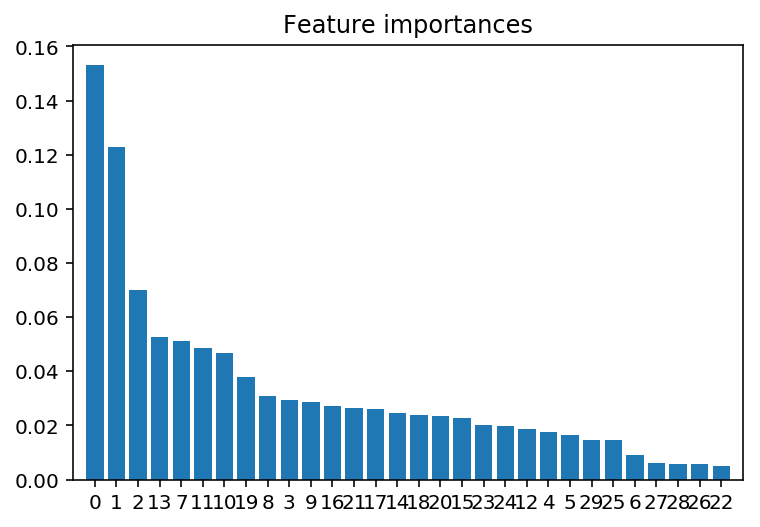

In [45]:
importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print('{:d}. X_{:d} ({:2.4f})'.format(f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Mejorando la regla de decision
### en vez de 0.5 usaremos un percentil

## Probabilidad de corte

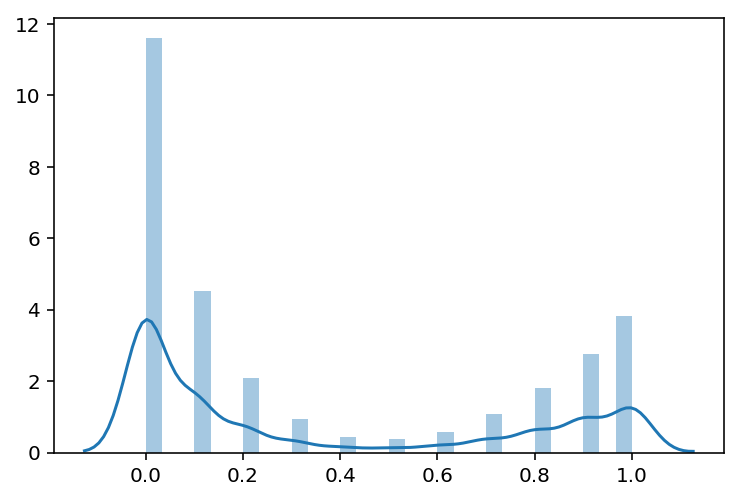

0.9000000000000001

In [46]:
sns.distplot(Y_train_prob)
plt.show()
pcut = np.percentile(Y_train_prob,80)
pcut

In [47]:
Y_train_pred = Y_train_prob > pcut 
Y_test_pred = Y_test_prob > pcut
eval_model(Y_train,Y_train_pred,w_train,Y_test,Y_test_pred,w_test)

--- Resultados --
- AUC train: 0.685 
- AUC test : 0.575 
- AMS train: 22.957 sigma
- AMS test : 2.923 sigma


(22.957160733347333, 2.9234126169111603)

# Actividad:

* Escoge algun algoritmo que no hayamos visto.
* Trata de entender la idea central en 5 minutos.
* Identifica los componentes (Modelo, funcion objectivo, optimizador)
* Entrenar un algoritmo.
* Optimizar los hiperparametros.

## SVMClassifier 

** Modelo :** $h_{\theta}(x) = g(\theta^{T}x)$ con $g(z)=\frac{1}{1+e^{-z}}$

** Costo :** $$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}y^{i}\log(h_\theta(x^{i}))+(1-y^{i})\log(1-h_\theta(x^{i}))$$
** Optimizador:** Descenso de gradiente


Ojo, la derivada del costo es:
$$ \frac{\partial}{\partial\theta_{j}}J(\theta) =\sum_{i=1}^{m}(h_\theta(x^{i})-y^i)x_j^i$$

In [7]:
#Modelo SVM#
from sklearn.svm import LinearSVC
#from sklearn import svm # <-- Took so long ...
#clf = svm.SVC(C=1, gamma='auto', kernel='rbf')
clf = LinearSVC(random_state=0)
clf.fit(X_train,Y_train) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [12]:
import sklearn as sk
# Evaluate model
Y_train_pred = clf.predict(X_train)
Y_test_pred = clf.predict(X_test)
#Y_train_prob=clf.predict_proba(X_train)[:,1]
#Y_test_prob =clf.predict_proba(X_test)[:,1]
eval_model(Y_train,Y_train_pred,w_train,Y_test,Y_test_pred,w_test)

--- Resultados --
- AUC train: 0.526 
- AUC test : 0.524 
- AMS train: 0.829 sigma
- AMS test : 1.434 sigma


(0.8292540580611238, 1.43444955556857)